#### Importation des librairies 

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

#### Téléchargement du jeu de données

In [10]:
data = pd.read_csv("wine_train.csv")
X_test = pd.read_csv("wine_test.csv")

#On sépare les covariables et variable à prédire 
X = data[data.columns[0:-1]]
y = data[["target"]]

#Division du jeu de données
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y, test_size=0.33, random_state=2023)

On définit les fonctions dont on fera usage ultérieurement: 

In [28]:
def partie_entiere(vector):
    for i in range(len(vector)): 
        vector[i] = np.int64(vector[i])
    return vector

def partie_decimale(vector): 
    for i in range(len(vector)): 
        dec = vector[i] % 1
        if dec >= 0.5: 
            vector[i] = np.int64(vector[i]) + 1
        else: vector[i] = np.int64(vector[i])
    return vector

def train_eval(model, metric, X, y, X_test, y_test):
    lab = str(model()) 
    #Entrainement du modèle 
    mod = model()
    mod.fit(X,y)
    pred = mod.predict(X_test)

    plt.figure()
    plt.hist(y_te, density=True, label="True", alpha=0.5, bins=np.linspace(3,9,7))
    plt.hist(pred, density=True, label=lab, alpha=0.5, bins=np.linspace(3,9,7))
    plt.title("Histogramme des predicitions de "+lab)
    plt.legend()
    plt.show()

    #y_pred_i = partie_entiere(pred)
    print("normal: ", metric(y_test, pred))
    print("entiere: ", metric(y_test, partie_entiere(pred)))
    print("dec: ", metric(y_test, partie_decimale(pred)))
    return pred

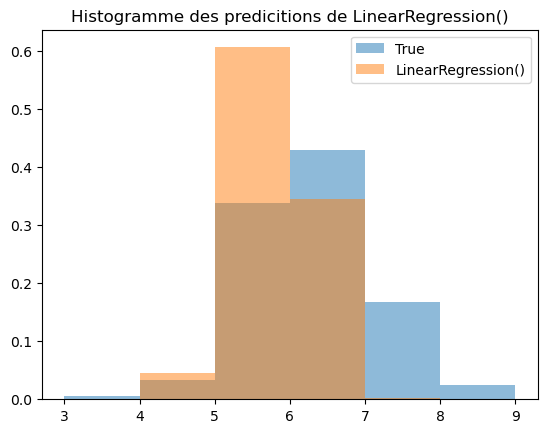

normal:  0.30163834441889725
entiere:  -0.1114672018691012
dec:  -0.1114672018691012


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


p = train_eval(LinearRegression, r2_score, X_tr, y_tr, X_te, y_te)

On constate que le modèle à du mal à prédire des classes situées aux extrêmités. Ceci pourrait être du à la répartition inégale des effectifs de chaque classe. On va ainsi essayer de créer des effectifs artificiels pour gerer ce déséquilibre. 

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

